# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](img/kaggle1.png)
![kaggle2.png](img/kaggle2.png)
&nbsp;
2. Scroll down to API and click Create New API Token.
![kaggle3.png](img/kaggle3.png)
![kaggle4.png](img/kaggle4.png)
&nbsp;
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](img/kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
from dotenv import dotenv_values

CONFIG = dotenv_values('.env')

kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](img/kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/variation of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
learner_kwargs = {"ignored_columns":["casual", "registered"]}
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error", verbosity=0, learner_kwargs=learner_kwargs)
predictor.fit(train, time_limit=600, presets='best_quality')

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary(verbosity=1)
print()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.046066      22.298079  561.912449                0.000686           0.193772            3       True         13
1   RandomForestMSE_BAG_L2  -53.339129      16.039227  428.463563                0.641221          48.772569            2       True         12
2          LightGBM_BAG_L2  -55.038662      16.400542  428.342547                1.002537          48.651552            2       True         11
3        LightGBMXT_BAG_L2  -60.226781      20.653635  464.294556                5.255629          84.603562            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.129323    0.150804                0.129323           0.150804            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.130286    0.830792         

### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions.head()

0    23.109352
1    42.567101
2    46.541908
3    49.167961
4    51.509071
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.636223
std        89.959038
min         3.008262
25%        20.283548
50%        63.823772
75%       167.690659
max       367.473419
Name: count, dtype: float64

In [14]:
# How many negative values do we have?
sum(predictions<0)

0

In [15]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [16]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [17]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 405kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-29 18:58:46  new features with hyperparameters  complete  0.59427      0.59427       
submission_new_features.csv  2023-05-29 18:50:07  new features                       complete  0.61217      0.61217       
submission.csv               2023-05-29 18:38:21  first raw submission               complete  1.79979      1.79979       


#### Initial score of **1.79979**

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

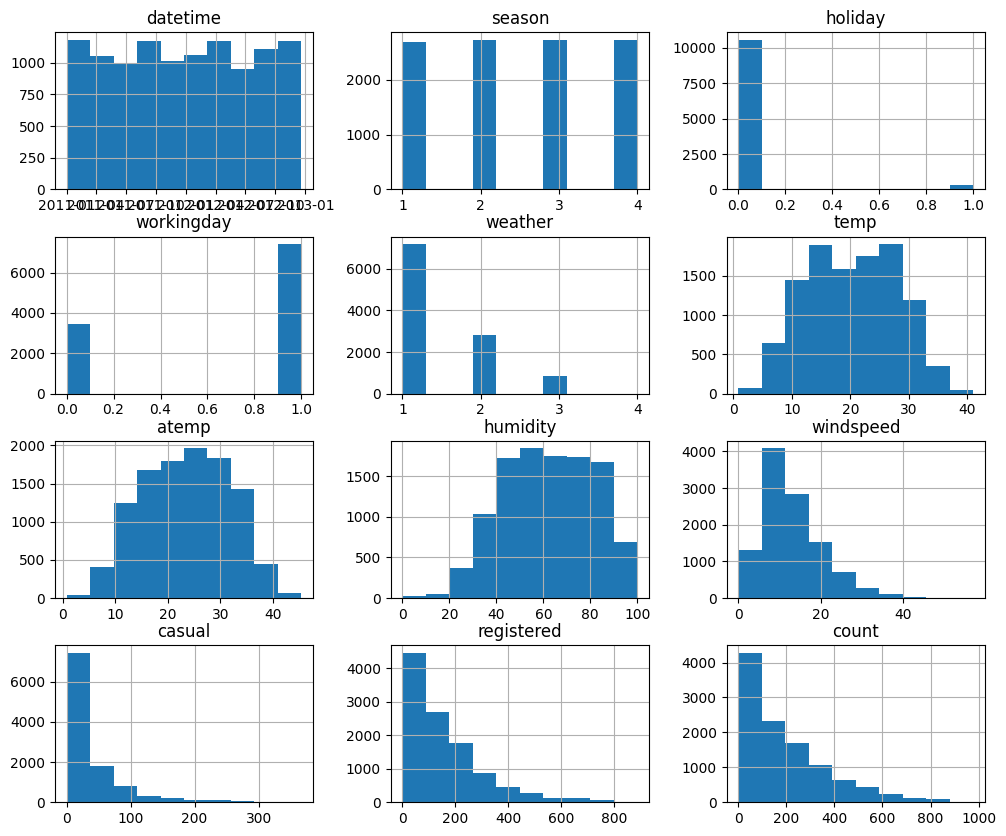

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12,10))

In [20]:
# create a new feature
train["year"] = train.datetime.dt.year
test["year"] = test.datetime.dt.year

train["month"] = train.datetime.dt.month
test["month"] = test.datetime.dt.month

train["day"] = train.datetime.dt.day
test["day"] = test.datetime.dt.day

train["hour"] = train.datetime.dt.hour
test["hour"] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [21]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [22]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

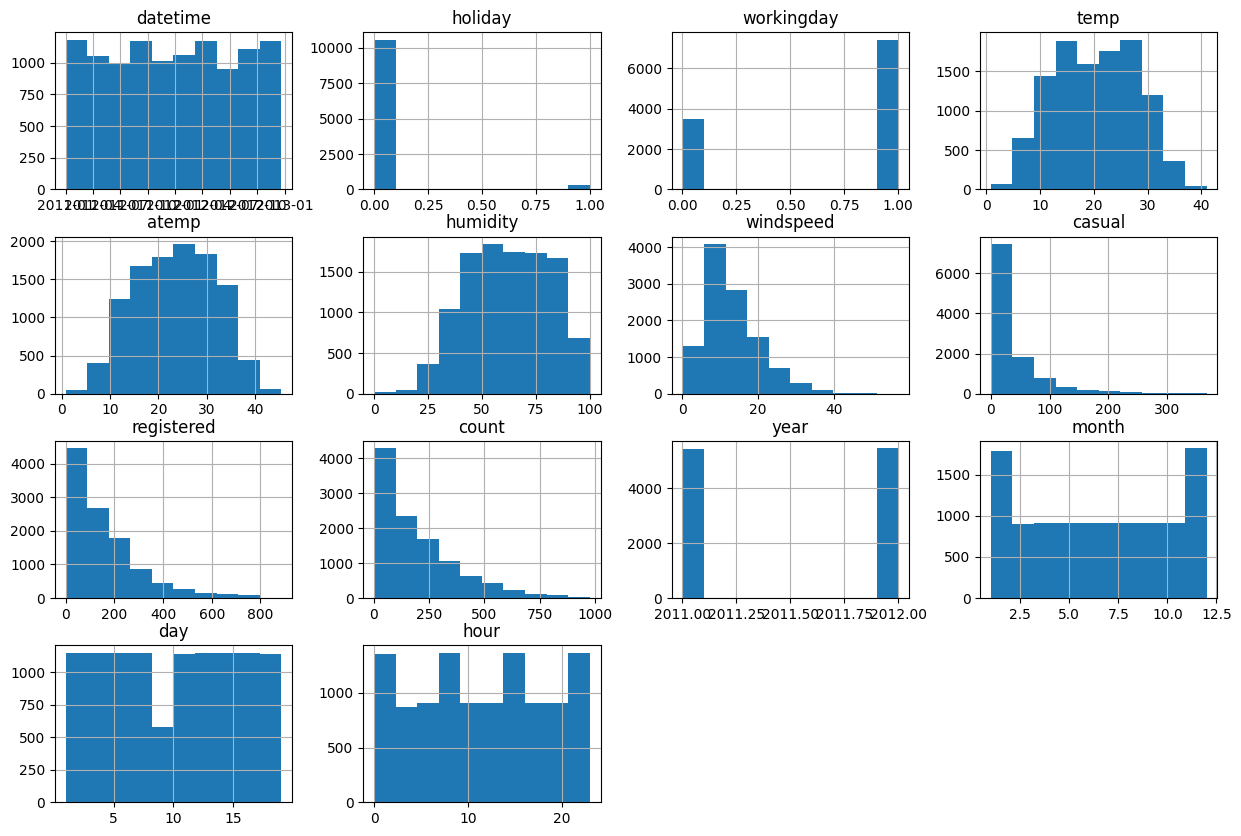

In [23]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [24]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error", verbosity=0, learner_kwargs=learner_kwargs)
predictor_new_features.fit(train, time_limit=600, presets='best_quality')

In [25]:
predictor_new_features.fit_summary(verbosity=1)
print()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.361327      28.093183  581.784915                0.000852           0.249621            3       True         13
1          LightGBM_BAG_L2  -30.580885      25.385942  431.830206                0.562042          46.346264            2       True         10
2        LightGBMXT_BAG_L2  -31.163852      26.367170  432.623924                1.543270          47.139982            2       True          9
3          CatBoost_BAG_L2  -31.235768      24.965117  436.934596                0.141217          51.450654            2       True         12
4   RandomForestMSE_BAG_L2  -31.596852      25.845801  436.598395                1.021901          51.114452            2       True         11
5      WeightedEnsemble_L2  -32.236441      23.899906  371.790237         

In [26]:
# Remember to set all negative values to zero
predictions = predictor_new_features.predict(test)
predictions[predictions<0] = 0

In [27]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 405kB/s]
Successfully submitted to Bike Sharing Demand

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-29 18:50:07  new features                       complete  0.61217      0.61217       
submission.csv               2023-05-29 18:38:21  first raw submission               complete  1.79979      1.79979       
submission_new_hpo.csv       2023-05-27 00:41:19  new features with hyperparameters  complete  0.63410      0.63410       
submission_new_features.csv  2023-05-27 00:32:43  new features                       complete  0.76393      0.76393       


#### New Score of **0.61217**

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [30]:
import autogluon.core as ag

fastai_params = {
    'layers': [100, 50],  # number of neurons in each layer
    'emb_drop': 0.2,      # Dropout rate for embedding layers
    'ps': [0.4, 0.3],     # Dropout rate for the continuous and categorical embeddings
}

gbm_params = {  
    'num_boost_round': 50,  # number of boosting rounds 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees
}

hyperparameters = {'GBM': gbm_params, 'FASTAI': fastai_params}  

hyperparameter_tune_kwargs = {
    'num_trials': 3,
    'scheduler' : 'local',
    'searcher': 'auto',
}

In [31]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error", verbosity=0, learner_kwargs=learner_kwargs)
predictor_new_hpo.fit(
                      train, 
                      time_limit=600, 
                      presets='best_quality', 
                      hyperparameters=hyperparameters, 
                      hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
                     )

In [32]:
predictor_new_hpo.fit_summary(verbosity=1)
print()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   LightGBM_BAG_L2/T2 -40.709733       1.578219  319.475439                0.000141          33.785395            2       True          6
1  WeightedEnsemble_L3 -40.709733       1.581658  320.131440                0.003439           0.656002            3       True          7
2   LightGBM_BAG_L2/T1 -42.962204       1.580044  330.013105                0.001967          44.323062            2       True          5
3  WeightedEnsemble_L2 -45.784511       1.286674  201.606309                0.000791           0.195981            2       True          4
4   LightGBM_BAG_L1/T2 -45.793587       0.315684  113.758321                0.315684         113.758321            1       True          2
5   LightGBM_BAG_L1/T3 -47.680098       0.970199   87.652007                0.970199          87.652007 

In [33]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
predictions[predictions<0] = 0

In [34]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 351kB/s]
Successfully submitted to Bike Sharing Demand

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-29 18:58:46  new features with hyperparameters  complete  0.59427      0.59427       
submission_new_features.csv  2023-05-29 18:50:07  new features                       complete  0.61217      0.61217       
submission.csv               2023-05-29 18:38:21  first raw submission               complete  1.79979      1.79979       


#### New Score of **0.59427**

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

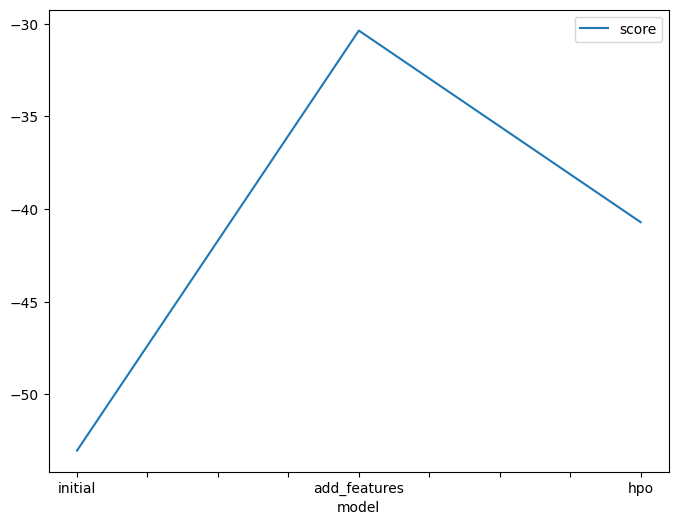

In [37]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [
                  predictor.leaderboard(silent=True)['score_val'][0],
                  predictor_new_features.leaderboard(silent=True)['score_val'][0],
                  predictor_new_hpo.leaderboard(silent=True)['score_val'][0]
                 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

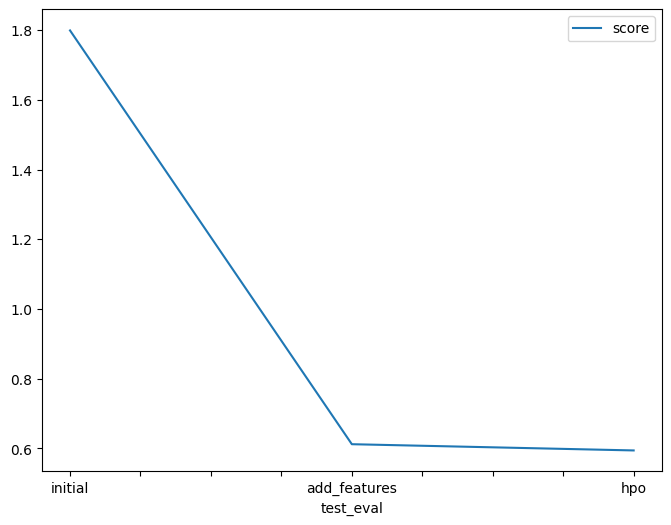

In [44]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79979, 0.61217, 0.59427]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [45]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "FASTAI: layers=[100, 50]"],
    "hpo2": ["default", "default", "FASTAI: emb_drop=0.2"],
    "hpo3": ["default", "default", "GBM: num_boost_round=50"],
    "score": [1.79979, 0.61217, 0.59427]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.79979
1,add_features,default,default,default,0.61217
2,hpo,"FASTAI: layers=[100, 50]",FASTAI: emb_drop=0.2,GBM: num_boost_round=50,0.59427
